**이 노트북은 캐글에 처음 입문한 학생들을 위하여 제작되었습니다.**

**제가 처음 타이타닉 생존자 예측 문제를 해결한 다음 tabular playground을 경험하며 얻은 기술들을 중심으로 작성하였습니다.**

**tabular data에 대해서는 타이타닉 생존자 예측 문제가 초심자 국룰이라고 생각되어 타이타닉 생존자 예측 데이터를 사용하였습니다.**

**타이타닉 문제는 오랜기간 연구되었던 만큼 여러가지 기법이 있습니다.**

**이 노트북은 일반 tabular data를 다루는 것과 같이 진행하도록 하겠습니다.**

***그리고 절대 타이타닉 대회에서 유출된 서브미션을 제출하지 마세요.(mmo같은 이상한 변수를 만들고 안한 척 하는 등)***

주의 : gpu를 사용하는 커널입니다 한번 실행시키고 우측 상단의 전원을 꺼서 gpu 손실을 줄이시길 바랍니다.

# Import

**python에서는 외부 라이브러리를 사용하기 위하여 import하는 과정을 거칩니다.**

***import pandas***를 진행하면 pandas 라이브러리가 import 되지만 보통은 pandas.~를 치기 귀찮아서 as pd로 축약합니다.

**as pd를 붙이면 다음부터 pandas를 pd로 사용할 수 있습니다.**

**이와 같이 numpy를 np로 축약하고 matplotlib를 plt, seaborn을 sns로 사용합니다.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **데이터 불러오기**

**pandas의 read_csv 기능에 파일 경로를 입력하면 csv 파일을 읽을 수 있습니다**

경로는 copy file path 기능을 이용하면 편합니다.(data 파일 오른쪽에 copy 버튼이 있습니다.)

In [ ]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
#pd.read_csv는 csv파일을 pandas dataframe형식으로 바꾸어 데이터를 다루기 쉽게 합니다.

# **데이터 살펴보기 + 약간의 전처리**

In [ ]:
train.head()
#pandas의 head method를 사용하면 데이터를 위에서 n개 확인할 수 있습니다. (default : 5)

In [ ]:
train.info()
#pandas의 info method를 사용하면 데이터의 자료형, null값의 수를 알 수 있습니다.
#null 값들이 몇개 보입니다.

**PassengerId**

In [ ]:
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")
#PassengerId는 id입니다 index로 사용해봅시다.
#pandas의 set_index를 사용하여 특정 column을 index로 지정할 수 있습니다.

**Pclass**

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x="Pclass", y="Survived",data=train)
#1등석일수록 생존율이 높습니다.
#전처리 없이 학습 할 때 그대로 사용해도 될 것 같습니다.
#seaborn을 이용하여 막대그래프를 그릴 수 있습니다.

**Name**

In [ ]:
train["Name"].head()

In [ ]:
train["Name_2"] = train["Name"].str.split(",").str[1].str.split(".").str[0].str[1:]
test["Name_2"] = test["Name"].str.split(",").str[1].str.split(".").str[0].str[1:]
#이름을 쉼표로 구분하고 2번째 인자에서 마침표로 구분하여 1번째에 있는 경칭을 리턴합니다.
#pandas에서 문자열 데이터를 한번에 처리하기 위하여 str함수를 사용하는 것이 좋습니다.

In [ ]:
train["last_name"] = train["Name"].str.split(",").str[0]
test["last_name"] = test["Name"].str.split(",").str[0]
#이름을 쉼표로 구분하고 1번째에 있는 성씨를 리턴하여 일행 등의 feature를 이용합니다.

In [ ]:
train["last_name"].nunique()
#성씨가 많습니다.
#pandas의 nunique를 사용하면 고유값의 수를 알 수 있고 unique를 사용하면 고유값을 알 수 있습니다.

In [ ]:
imsi_df = pd.concat([train,test],axis=0)
train["last_name_sum"] = train["last_name"].map(dict(imsi_df["last_name"].value_counts()))
test["last_name_sum"] = test["last_name"].map(dict(imsi_df["last_name"].value_counts()))
#같은 성씨가 몇 명 있는지로 feature를 추가합시다(sibsp나 parch와 비슷한 효과를 기대해봅시다.)
#이 때 test data를 보유하고 있기 때문에 test data에서의 정보도 함께 이용합니다.
#고유값별로 몇개 있는지 계산해서 딕셔너리를 이용해 대입시켜 새로운 feature를 생성합니다.

In [ ]:
train = train.drop("last_name",axis=1)
test = test.drop("last_name",axis=1)
#성씨 column은 drop 합시다.
#drop을 통해 특정행, 특정열을 삭제할 수 있습니다.

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x="Name_2", y="Survived",data=train)
#경칭에 대해서는 one hot encoding을 하는 것이 좋을 것 같습니다.

In [ ]:
train[train["Name_2"]=="Rev"]
#신부님은 모두 돌아가셨습니다.

In [ ]:
train[train["Name_2"]=="Don"]
#Don이란 경칭은 선생님이라고 하네요.
#위의 방법처럼 "train" dataframe에서 name_2 column의 값이 rev인 행을 추출할 수 있습니다.

In [ ]:
train[train["Name_2"]=="Capt"]
#Capt인데 선장님은 아니네요 모르겠습니다.

In [ ]:
train[train["Name_2"]=="Sir"]
#기사 작위를 받은 분도 한명있었던 것 같습니다.

In [ ]:
train[train["Name_2"]=="Lady"]
#위에 있는 분과 일행인 것 같네요

In [ ]:
train[train["Name_2"]=="Ms"]
#한분 계십니다.

In [ ]:
train[train["Name_2"]=="Mme"]
#madame(마담) 프랑스 기혼 여성에게 주어지는 호라고 합니다.(공경의 의미도 있는 것 같네요.)

In [ ]:
train[train["Name_2"]=="Mlle"]
#Mademoiselle(마드모아 젤) 프랑스 미혼 여성에게 주어지는 호라고 합니다.(성차별의 이유로 요즘에는 잘 쓰이지 않는다고 합니다.)

In [ ]:
train[train["Name_2"]=="Jonkheer"]
#Jonkheer는 귀족 내에서 낮은 경칭이라고 합니다.
#한명이기 때문에 Jonkheer의 생존율은 0%입니다.

In [ ]:
train = train.drop("Name",axis=1)
test = test.drop("Name",axis=1)
#이제 Name feature를 drop해줍시다.

이름에 따라 생존율이 0%거나 100%인 특이 케이스를 조사해보았는데 보편적으로는 그 호칭의 수가 적어서 생존율이 극단적으로 나타난 것을 확인할 수 있습니다.

그리고 신부님(rev)들은 모두 희생되신 것 같습니다.

**sex**

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x="Sex", y="Survived",data=train)
#여성의 생존율이 남성에 비해 굉장히 높은 것을 알 수 있습니다.
#차이가 크기 때문에 학습 할 때 ordinal encoding을 이용하여 이용해줍시다.

**age**

In [ ]:
train["Age"].unique()[:50]
#나이는 그대로 학습시키거나 binning하는 것이 좋을 것 같습니다.

**SibSp**

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x="SibSp", y="Survived",data=train)
#동승자 중 형제, 배우자의 수가 1~2명인 분들의 생존율이 비교적 높게 나타났습니다.
#동승자 중 형제, 배우자의 수가 없는 분은 생존율이 낮았습니다.

In [ ]:
train[train["SibSp"]>=5].sort_values("SibSp")
#동승자 중 형제, 배우자의 수가 5명 이상인 분들은 모두 사망하셨습니다.
#동승자 중 형제, 배우자의 수가 6명이면 그 일행에 대해 SibSp가 5로 표현될 것입니다만 5명 일행에 1명이 부족하고 8명 일행에 2명이 부족하네요.
#sort_values를 사용하면 특정 column을 기준으로 정렬할 수 있습니다.

In [ ]:
test[test["SibSp"]>=5]
#test 데이터에 계시네요.

In [ ]:
train[(train["SibSp"]==3)|(train["SibSp"]==4)]["Survived"].sum()/len(train[(train["SibSp"]==3)|(train["SibSp"]==4)])
#동승자 중 형제, 배우자의 수가 3~4명인 분들도 확실하게 많이 살아남았다고 하기엔 애매합니다.

**Parch**

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x="Parch", y="Survived",data=train)
#동승자 중 부모님과 아이들의 수가 1~2명인 분들의 생존율이 비교적 높게 나타났습니다.
#동승자 중 부모님과 아이들의 수가 없는 분은 생존율이 낮았습니다.

In [ ]:
train[(train["Parch"]==4) | (train["Parch"]==6)]
#동승자 중 부모님과 아이들의 수가 4,6명인 분들은 모두 사망하셨습니다.
#근데 일행이 6명이면 parch가 6인 데이터도 6개 이상 있어야 하는거 아닌가요 모르겠습니다.
#Fortune, Mr. Mark는 호실을 3개 예약했습니다. 가족들 호실을 한번에 예약한 걸수도 있겠네요.

In [ ]:
train[train["Parch"]==5]
#동승자 중 부모님과 아이들의 수가 5명인 분들은 표본이 적습니다. 5분중 한분만 살아남았습니다.

In [ ]:
train[train["Parch"]==3]
#동승자 중 부모님과 아이들의 수가 3명인 분들은 5분 중 3분이 살아남으셨습니다.

In [ ]:
len(train[train["Parch"]==2])
#동승자 중 부모님과 아이들의 수가 2명인 분들도 꽤 있네요.

In [ ]:
len(train[train["Parch"]==1])
#동승자 중 부모님과 아이들의 수가 1명인 분들도 꽤 있네요.

In [ ]:
len(train[train["Parch"]==0])
#동승자 중 부모님과 아이들의 수가 0명인 분들이 대다수네요.

**Ticket**

In [ ]:
train["Ticket"].unique()[:50]
#모르겠습니다.

In [ ]:
train = train.drop("Ticket",axis=1)
test = test.drop("Ticket",axis=1)

**fare**

In [ ]:
train["Fare"].unique()[:50]
#가격은 그대로 학습시키거나 binning하는 것이 좋을 것 같습니다.

**cabin**

In [ ]:
train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]
#선실번호에서 titanic호의 deck을 알 수 있습니다.

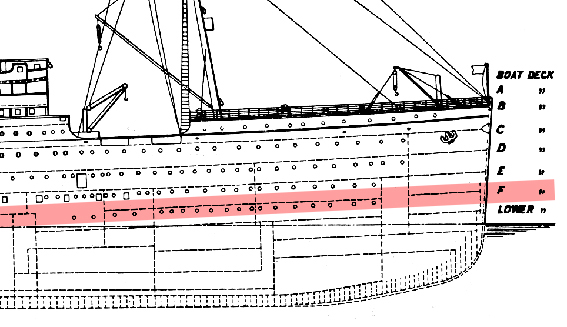

https://titanicofficers.com/titanic_06_boxhall_07.html(이미지 출처)

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x="Cabin", y="Survived",data=train)
#NaN값을 포함하여 one_hot_encoding을 이용하여 처리해주는 것이 좋을 것 같습니다.

**Embarked**

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x="Embarked", y="Survived",data=train)
#탑승한 항구는 one hot encoding을 하는 것이 좋을 것 같습니다.

**encoding**

In [ ]:
train.head()
#nan 값은 인공지능이 학습하기 어렵기 때문에 값을 채워주어야합니다.
#문자열값은 인공지능이 학습하기 어렵기 때문에 값을 숫자로 변경해야합니다.

In [ ]:
sex_mapping={"male":0,"female":1}
train["Sex"]=train["Sex"].map(sex_mapping)
test["Sex"]=test["Sex"].map(sex_mapping)
#성별이 생존에 큰 영향을 미치기 때문에 ordinal encoding을 이용하여 치환해줍니다.
#OrdinalEncoder를 사용해도 좋습니다.
#위에 한번 등장하였지만 map을 이용하여 딕셔너리를 대입할 수 있습니다.

In [ ]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
#평균값, 최빈값 등을 사용하여 결측치를 채울 수 있습니다.
#결측값은 fillna를 이용하여 채울 수 있습니다.

In [ ]:
train = pd.get_dummies(train, columns = ["SibSp","Parch","Name_2","Embarked"])
test = pd.get_dummies(test, columns = ["SibSp","Parch","Name_2","Embarked"])
train = pd.get_dummies(train, columns = ["Cabin"], dummy_na = True)
test = pd.get_dummies(test, columns = ["Cabin"], dummy_na = True)
#pandas의 get_dummies를 이용하여 one hot encoding을 진행할 수 있습니다.
#dummy_na 옵션을 true로 설정하면 nan 값을 하나의 값으로 인식합니다.

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train["Parch_9"] = 0 #parch_9라는 column을 새로 만들고 값을 모두 0으로 설정합니다.
test["Name_2_Capt"] = 0
test["Name_2_Jonkheer"] = 0
test["Name_2_Lady"] = 0
test["Name_2_Major"] = 0
test["Name_2_Mlle"] = 0
test["Name_2_Mme"] = 0
test["Name_2_Sir"] = 0
test["Name_2_the Countess"] = 0
test["Cabin_T"] = 0
test = test.rename(columns = {"Name_2_Dona":"Name_2_Don"})
#data가 다르네요 column수를 맞춰줍시다.
#dona와 don 모두 선생님이라고 합니다.

In [ ]:
len(train.columns)

In [ ]:
len(test.columns)

**이제 Age 결측치를 채워줍시다.**

**나이를 제외한 feature들의 값과 나이 값을 학습한다음, 나이 값이 결측된 행들의 다른 feature들을 이용하여 나이의 결측 값을 채워넣습니다.**

In [ ]:
age_fill_df = train.dropna()
X = age_fill_df.drop(["Survived","Age"],axis=1)
y = age_fill_df["Age"]
age_fill_df = test.dropna()
X = pd.concat([X,age_fill_df.drop(["Age"],axis=1)],axis=0)
y = pd.concat([y,age_fill_df["Age"]],axis=0)
#X는 나이를 제외한 feature이고 y는 나이값입니다.
#concat을 이용하여 두 dataframe을 결합할 수 있습니다.
#pandas의 dropna를 사용하면 결측값이 있는 행을 제거할 수 있습니다.

In [ ]:
from catboost import CatBoostRegressor
cat_cols = list(X.columns)
cat_cols.remove("Fare")
cat_cols.remove("last_name_sum")
model = CatBoostRegressor(cat_features = cat_cols)
model.fit(X,y,verbose=0)
#범주형 feature가 많기 때문에 범주형 column들을 지정해서 catboost를 이용하여 학습시킵니다.
#catboost는 범주형 feature가 많을 때 좋은 성능을 보이며 하이퍼 파라미터 튜닝이 크게 필요하지 않아서 사용했습니다.

In [ ]:
imsi_df = train[train["Age"].isnull()]
imsi_df["Age"] = np.around(model.predict(train[train["Age"].isnull()].drop(["Survived","Age"],axis=1)))
train = pd.concat([train.dropna(),imsi_df],axis=0)
train = train.sort_index()

imsi_df = test[test["Age"].isnull()]
imsi_df["Age"] = np.around(model.predict(test[test["Age"].isnull()].drop(["Age"],axis=1)))
test = pd.concat([test.dropna(),imsi_df],axis=0)
test = test.sort_index()
#예측한 값을 적용하여 data를 재구성하였습니다.

In [ ]:
train.isnull().sum()
#결측값이 모두 채워진 것을 확인할 수 있습니다.

**데이터를 보다 더직관적으로 수정하는 기법에는 kmeans, pca 등 여러가지 기법이 있습니다.**

**그러나 kmeans보다는 binning이 더 적합하다고 생각했습니다.**

**또, pca는 수학적 이해가 완벽하지 않아서 추후에 설명을 하기 힘들다고 판단되어 사용하지 않았습니다.**

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler().fit(train[["Age"]])
train["Age"] = robust.transform(train[["Age"]])
robust = RobustScaler().fit(train[["Fare"]])
train["Age"] = robust.transform(train[["Fare"]])
#scaler를 사용하면 수치형 데이터의 값을 특정 범위내에 비슷하게 맞춰줍니다.

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler().fit(test[["Age"]])
test["Age"] = robust.transform(test[["Age"]])
robust = RobustScaler().fit(test[["Fare"]])
test["Fare"] = robust.transform(test[["Fare"]])

In [ ]:
cat_cols = list(train.columns)
cat_cols.remove("Survived")
cat_cols.remove("last_name_sum")
cat_cols.remove("Age")
cat_cols.remove("Fare")
train[cat_cols] = train[cat_cols].astype("category")
test[cat_cols] = test[cat_cols].astype("category")
train["Survived"] = train["Survived"].astype(int)
#이유는 잘 모르겠지만 스케일링 이후 값들이 다 float형식으로 바뀌어서 category로 바꿔줍니다.
#column의 자료형은 astype로 변경할 수 있습니다.

In [ ]:
train['Age'] = pd.cut(train["Age"], bins=5,labels=range(5))
test["Age"] = pd.cut(test["Age"], bins=5,labels=range(5))
train["Fare"] = pd.cut(train["Fare"], bins=10,labels=range(10))
test["Fare"] = pd.cut(test["Fare"], bins=10,labels=range(10))
#수치형 feature를 범주형 feature로 변환해주는 과정입니다.

In [ ]:
train["Age"] = train["Age"].astype(int)
train["Fare"] = train["Fare"].astype(int)
test["Age"] = test["Age"].astype(int)
test["Fare"] = test["Fare"].astype(int)
#변환 후 카테고리인 값을 int로 변환해줍니다.

In [ ]:
train.head()
#변환이 된 것을 볼 수 있습니다.

# **여러가지 model을 이용한 학습**

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#여러가지 모델들을 사용할 수 있습니다.
#각각의 모델에 대한 이해가 곧 좋은 예측을 유도합니다.
#때문에 적어도 boosting, tree 계열 알고리즘이 어떻게 동작하는지, 머신러닝 모델 관련 개념은 아는 것이 좋습니다.

In [ ]:
from sklearn.metrics import accuracy_score
#정확도를 평가지표로 사용할 예정이기 때문에 accuracy_score를 import합니다.

In [ ]:
X = train.drop("Survived",axis=1)
y = train["Survived"]
#X는 예측할 값을 제외한 학습에 사용할 feature입니다.
#y는 예측할 feature입니다.

**train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=62)
#학습을 하고 overfitting된 전체 dataset으로 검증할 수 없기 때문에 validation dataset을 8대 2의 비율로 생성합니다.

In [ ]:
model = XGBClassifier(eval_metric = "logloss",tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False)
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(pred,y_val)
#model의 hyperparameter를 설정하고 학습과 예측의 과정을 거칩니다.
#그 후, 예측값과 검증값을 비교하여 점수를 산출합니다.

In [ ]:
model = LGBMClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(pred,y_val)

In [ ]:
cat_cols = list(X.columns)
cat_cols.remove("last_name_sum")
cat_cols.remove("Age")
cat_cols.remove("Fare")
model = CatBoostClassifier(cat_features = cat_cols)
model.fit(X_train,y_train,verbose=0)
pred = model.predict(X_val)
accuracy_score(pred,y_val)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(pred,y_val)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(pred,y_val)

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(pred,y_val)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_val)
accuracy_score(pred,y_val)

**cross_validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
fold = StratifiedKFold(n_splits=5, shuffle = True, random_state=62)
#검증셋이 전체 데이터를 대표하지 않을 수도 있기 때문에 fold만큼 검증셋을 만들어 교차해서 검증하는 것을 cross validation이라고 합니다.

In [ ]:
model = XGBClassifier(eval_metric = "logloss")
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))
#5번의 검증 결과의 점수의 평균으로 점수를 정합니다.

In [ ]:
model = LGBMClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

In [ ]:
model = CatBoostClassifier(verbose=0,cat_features = cat_cols)
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

In [ ]:
model = RandomForestClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

In [ ]:
model = DecisionTreeClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

In [ ]:
model = GradientBoostingClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

In [ ]:
model = KNeighborsClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

**이외에도 grid search, optuna를 이용하여 hyperparameter search를 진행할 수 있고**

**stacking, pseudo labeling 등을 이용하여 성능을 향상시킬 수 있습니다.**

**그러나 데이터의 수가 적은 점과 catboost는 하이퍼 파라미터의 영향을 크게 받지 않는다는 점 때문에 그런지**

**위의 기법들을 시도해보았지만 성능이 향상되지 않았습니다.**

**위 기법들은 나중에 tps 같은 데이터를 이용하여 다뤄보도록 하겠습니다.**

# **submission**

In [ ]:
model = CatBoostClassifier(verbose=0,cat_features=cat_cols)
model.fit(X,y)
pred = model.predict(test)
#가장 좋은 성능을 보인 catboost를 이용합니다.

In [ ]:
sample_submission = pd.read_csv("../input/titanic/gender_submission.csv")
sample_submission["Survived"] = pred
sample_submission.to_csv("submission.csv", index=False)
#dataframe을 to_csv를 이용하여 csv로 만듭니다.